# Import Library

In [28]:
!pip install yfinance

# Background and Market Context

Before diving into the technical analysis, it’s important to understand the real-world events behind NVIDIA’s price movements. These three recent developments highlight why NVDA remains a highly watched stock:

1. NVIDIA CEO Calls Export Curbs a “Failure”

At Computex Taipei, Jensen Huang spoke out against U.S. restrictions, saying they pushed Chinese firms to accelerate their own AI chip development and dropped NVIDIA’s China revenue share from ~17% to ~13%.

Source: (https://www.cnbc.com/2025/05/21/nvidia-ceo-jensen-huang-slams-us-chip-restrictions-as-a-failure.html#:~:text=Nvidia%20CEO%20Jensen%20Huang%20said,from%2095%25%20to%2050%25)

2. Massive Charge from China Export Curbs

In April 2025, NVIDIA warned of a $5.5 billion quarterly charge tied to export restrictions on its H20 chips for China. That news triggered a sharp ~6% drop in after-hours trading.

Source: (https://www.cnbc.com/2025/04/15/nvidia-says-it-will-record-5point5-billion-quarterly-charge-tied-to-h20-processors-exported-to-china.html#:~:text=Tech-,Nvidia%20says%20it%20will%20record%20%245.5%20billion%20charge,H20%20processors%20exported%20to%20China&text=Nvidia%20said%20Tuesday%20that%20it,almost%205%25%20in%20extended%20trading.)

3. NVDA Climbs to All-Time High on Tech Rally

NVDA recently hit record highs around $154.31, driven by strong AI and robotics outlooks. Its market cap topped 3.7 trillion dollars, briefly overtaking Microsoft, as bullish analysts highlighted generative AI growth and sovereign investments.

Source: (https://www.investopedia.com/nvidia-stock-climbs-to-all-time-high-wednesday-update-11760933)

# Load Dataset

In [29]:
import yfinance as yf
import pandas as pd

tickers = ['NVDA']

data = yf.download(tickers, start='2020-07-01', end='2025-07-01')

close = data.xs('Close', axis=1, level=0)

print(close.head())



/tmp/ipython-input-29-2212318230.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-07-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed

Ticker           NVDA
Date                 
2020-07-01   9.498690
2020-07-02   9.580668
2020-07-06   9.806925
2020-07-07   9.839320
2020-07-08  10.182436


We load the NVDA stock dataset using yfinance library.

# Business Understanding

This project aims to understand the price behavior and volatility patterns of NVIDIA (NVDA), one of the world’s most valuable semiconductor companies and a key player in the global AI race. Given the high sensitivity of its stock price to both technological advancements and geopolitical events—such as U.S.-China trade tensions and export restrictions—modeling and interpreting its volatility is crucial for better risk assessment.

By applying Moving Averages (MA), Weighted Moving Averages (WMA), and Exponentially Weighted Moving Averages (EWMA), this analysis provides insight into both short-term and long-term trends. Moreover, the EWMA volatility model highlights periods of turbulence triggered by external shocks, aligning technical patterns with real-world business events.

This understanding is essential for investors, analysts, and risk managers aiming to quantify risk, detect trend shifts, and anticipate market reactions to news-driven events.

# Missing Values Checking

In [30]:
close.isnull().sum()

,0
Ticker,
NVDA,0


# Visualization

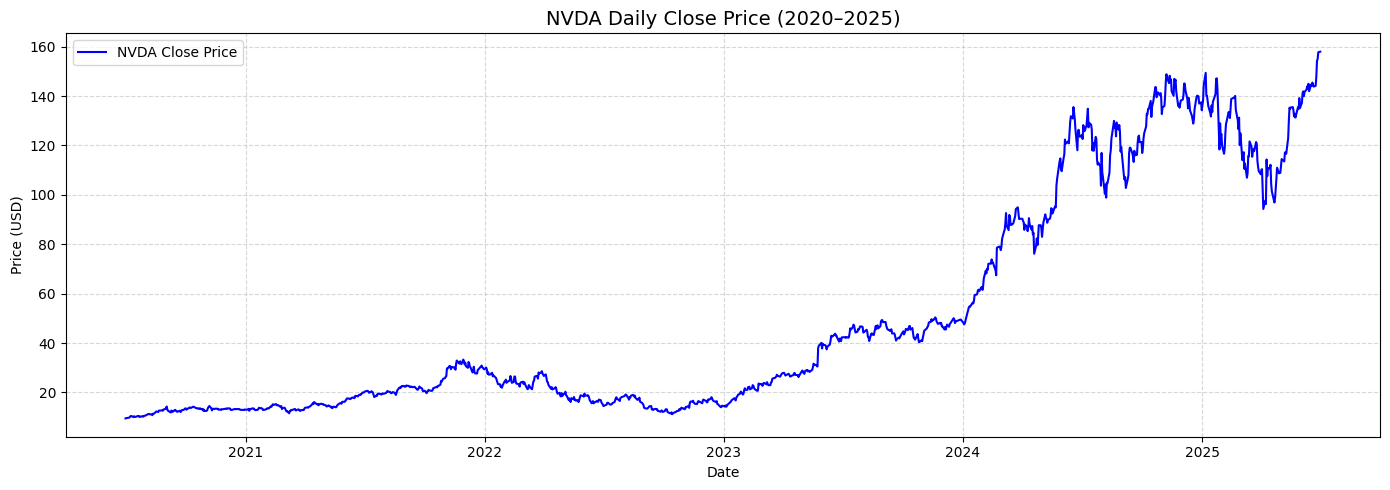

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(close.index, close['NVDA'], label='NVDA Close Price', color='blue')
plt.title('NVDA Daily Close Price (2020–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


NVDA’s price stayed relatively calm until mid-2023, before starting a sharp and steady climb throughout 2024 into 2025. The most noticeable peak happens around early 2025, reflecting just how much momentum the stock has gained. Even with a few dips along the way, the overall trend clearly shows strong investor interest.

# MA

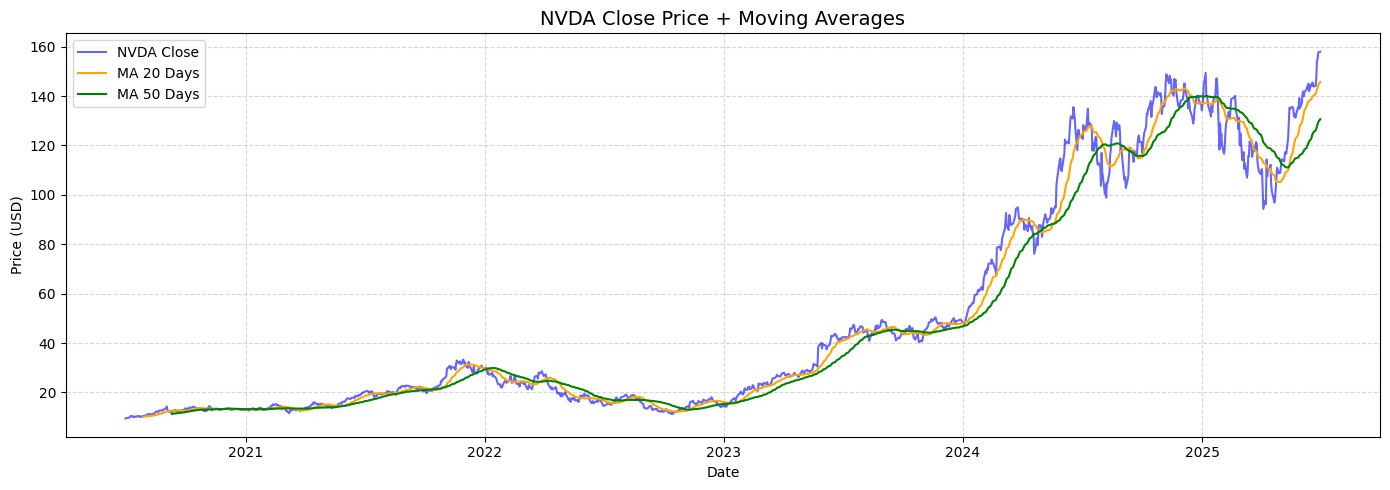

In [32]:
close['MA20'] = close['NVDA'].rolling(window=20).mean()
close['MA50'] = close['NVDA'].rolling(window=50).mean()

# Plot Close + MA
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(close['NVDA'], label='NVDA Close', color='blue', alpha=0.6)
plt.plot(close['MA20'], label='MA 20 Days', color='orange')
plt.plot(close['MA50'], label='MA 50 Days', color='green')
plt.title('NVDA Close Price + Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Moving Average (MA)

A **moving average (MA)** is a technique used to smooth out short-term fluctuations in stock prices and highlight longer-term trends. It works by averaging a set number of previous data points and updating that average as new data comes in. This helps reveal the general direction of a stock without being distracted by day-to-day volatility.

The formula for a simple moving average over *n* days is:

$$
MA_t = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}
$$

Where:
- $MA_t$ = moving average at time *t*
- $P_{t-i}$ = closing price *i* days before *t*

So, it's just the average of the last *n* closing prices.

Moving averages are commonly used to:
- Identify the **overall trend** of a stock
- Filter out **short-term noise**
- Detect **support/resistance** levels
- Generate **trading signals** (especially when two MAs cross)

Why Use 20-day and 50-day MA?

- The **20-day MA** represents about a month of trading days, often used for short-term trend analysis.
- The **50-day MA** is a common choice for medium-term trend spotting.

This pair is popular because the crossover between them can indicate a **shift in momentum**:
- When the 20-day MA crosses **above** the 50-day → **bullish signal**
- When it crosses **below** the 50-day → **bearish signal**

---

📌 Chart Interpretation

In the chart, you can see NVDA's closing price along with its 20-day and 50-day moving averages.

- The **20-day MA** closely follows the price, reacting quickly to changes.
- The **50-day MA** moves more slowly, capturing the broader trend.

During periods of upward momentum, the 20-day MA pulls away from the 50-day, confirming strength in the trend. When both lines are aligned and sloping upward, it reinforces the bullish sentiment. Occasional pullbacks are visible, but the moving averages help filter them out and emphasize the long-term direction.


# WMA

In [33]:
import numpy as np

# Bobot: Semakin baru, bobot semakin besar (misal: 1-20)
weights = np.arange(1, 21)

# Hitung WMA secara rolling
close['WMA20'] = close['NVDA'].rolling(window=20).apply(
    lambda x: np.dot(x, weights)/weights.sum(),
    raw=True
)


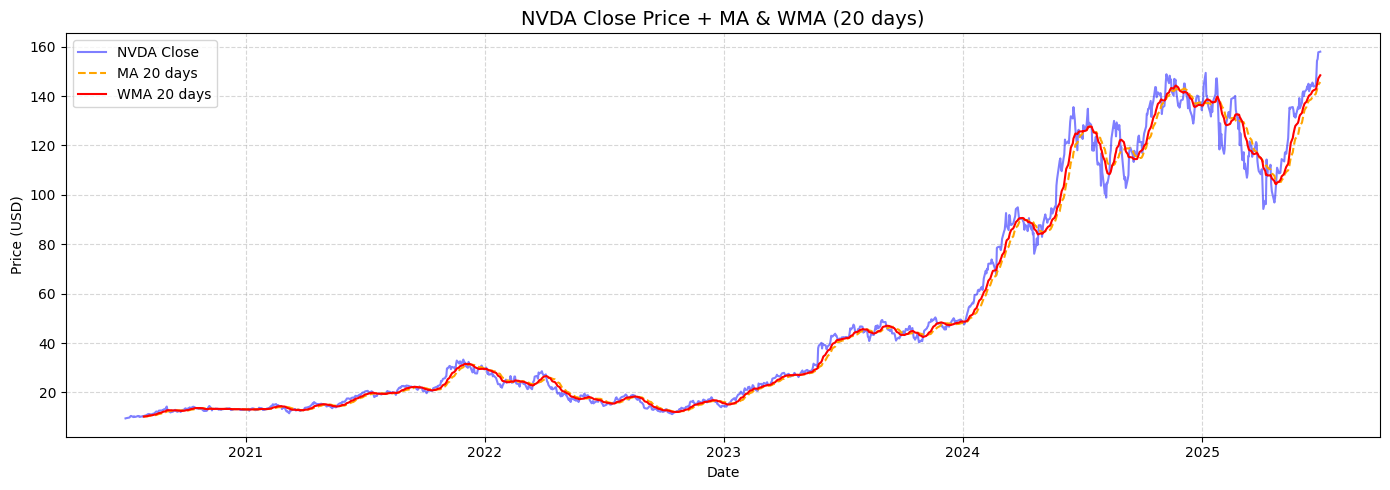

In [34]:
plt.figure(figsize=(14, 5))
plt.plot(close['NVDA'], label='NVDA Close', color='blue', alpha=0.5)
plt.plot(close['MA20'], label='MA 20 days', color='orange', linestyle='--')
plt.plot(close['WMA20'], label='WMA 20 days', color='red')
plt.title('NVDA Close Price + MA & WMA (20 days)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Weighted Moving Average (WMA)

A **Weighted Moving Average (WMA)** is similar to a simple moving average, but gives more weight to recent prices. This makes it more responsive to recent market movements compared to a standard MA.

Instead of averaging all prices equally, WMA multiplies each price by a weight that typically increases with recency.

For a WMA over *n* days:

$$
WMA_t = \frac{\sum_{i=1}^{n} w_i \cdot P_{t - n + i}}{\sum_{i=1}^{n} w_i}
$$

Where:
- $P_{t - n + i} $ = closing price *i* periods ago
- $w_i $ = weight assigned to that period (e.g., 1 to *n*)

The most recent price gets the highest weight, making the average more sensitive to current trends.

WMA reacts faster to price changes than a simple moving average. It's useful when:
- You want to give **more importance to recent data**
- You're analyzing **short-term trends**
- You're trying to detect **momentum shifts** earlier than with MA

Just like with the MA earlier, we use a **20-day WMA**. It reflects about a month of trading days and is commonly used by analysts for short-term technical signals.

---

📌 Chart Interpretation

In the chart, we compare:
- **NVDA closing price**
- **20-day simple moving average**
- **20-day weighted moving average**

The **WMA line follows the price more closely** than the MA line, especially during periods of sharp movement. This confirms that WMA gives more weight to recent data and can be slightly more responsive in picking up trend shifts.

You can clearly see that during strong uptrends, the WMA climbs faster than the MA. Likewise, in pullbacks, WMA drops sooner. This responsiveness makes it a useful tool for traders focused on short-term direction.


# EWMA

In [35]:
# EWMA (Exponential Weighted Moving Average)
close['EWMA20'] = close['NVDA'].ewm(span=20, adjust=False).mean()


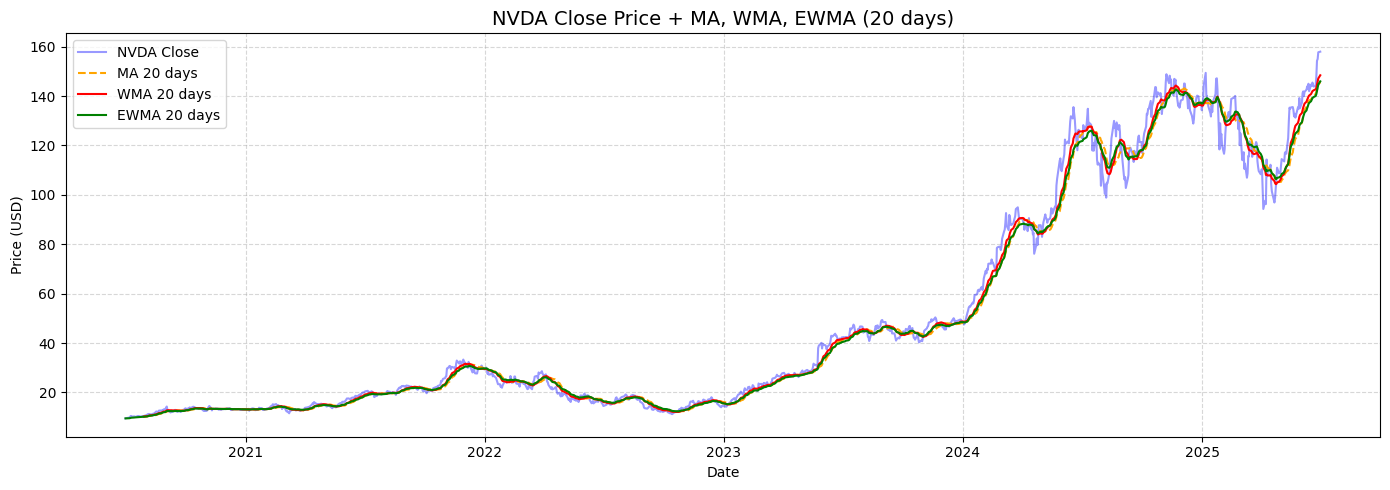

In [36]:
plt.figure(figsize=(14, 5))
plt.plot(close['NVDA'], label='NVDA Close', color='blue', alpha=0.4)
plt.plot(close['MA20'], label='MA 20 days', color='orange', linestyle='--')
plt.plot(close['WMA20'], label='WMA 20 days', color='red')
plt.plot(close['EWMA20'], label='EWMA 20 days', color='green')
plt.title('NVDA Close Price + MA, WMA, EWMA (20 days)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Exponential Weighted Moving Average (EWMA)

**Exponential Weighted Moving Average (EWMA)** is a type of moving average that applies exponentially decreasing weights to older prices. Unlike the simple or weighted versions, EWMA gives **the most emphasis to recent data** while still considering older data — but their impact fades quickly.

This makes EWMA more responsive than both MA and WMA, especially during sharp price movements.

The recursive formula for EWMA is:

$$
EWMA_t = \alpha \cdot P_t + (1 - \alpha) \cdot EWMA_{t-1}
$$

Where:
- $\alpha$ = smoothing factor (between 0 and 1), often derived from a chosen span
- $ P_t $ = current price
- $ EWMA_{t-1}$ = previous EWMA value

The smoothing factor $\alpha$ is usually calculated from the span with:

$$
\alpha = \frac{2}{\text{span} + 1}
$$

EWMA is especially useful when:
- You want a fast-reacting average without manually assigning weights
- You're analyzing **short-term volatility** or fast-moving price trends
- You want to model **time-varying risk**, such as in volatility forecasting

Compared to MA and WMA, EWMA offers a **smoother but more adaptive** signal.

A **20-day EWMA** is commonly used to track short-term momentum, similar to the MA and WMA we've used before. The difference lies in how quickly it reacts. With a 20-day span, the smoothing factor \( \alpha \approx 0.095 \), meaning about 9.5% of today's price contributes to today's EWMA value — and older data fades fast.

---

📌 Chart Interpretation

In the chart, you can see:
- **NVDA close price**
- **20-day MA (dashed orange)**
- **20-day WMA (red)**
- **20-day EWMA (green)**

The **EWMA line hugs the price more tightly** than both MA and WMA. It reacts faster to changes, but still smooths out short-term noise. This responsiveness makes it ideal for traders or analysts who want to capture trend shifts early without overreacting to daily fluctuations.

In NVDA’s case, the EWMA line rises more sharply during price rallies and softens more quickly during pullbacks, showing its ability to track momentum in real time.


# Log Return

In [37]:
import numpy as np

close['LogReturn'] = np.log(close['NVDA'] / close['NVDA'].shift(1))


In [38]:
# Bisa langsung pakai std dev dari log return yang dihaluskan secara eksponensial
close['EWMA_vol'] = close['LogReturn'].ewm(span=20, adjust=False).std()


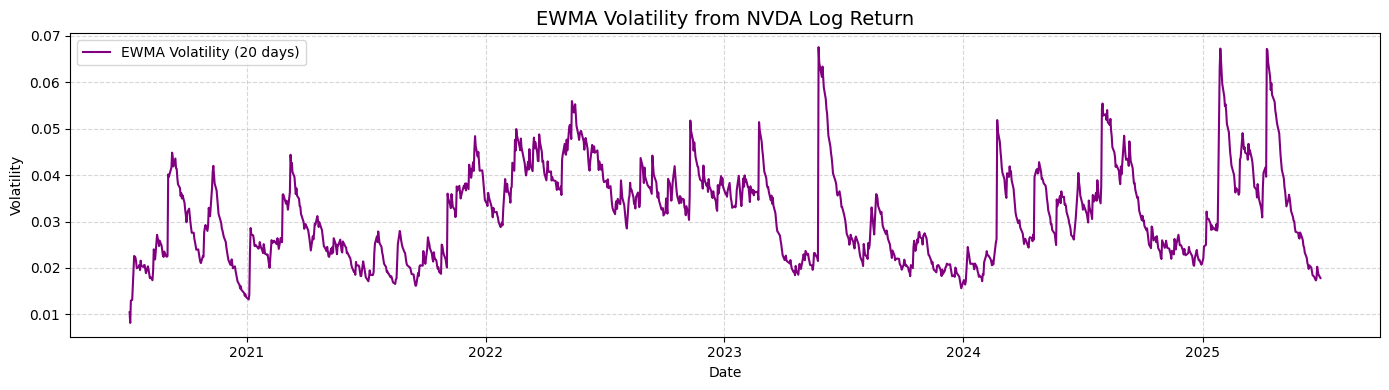

In [39]:
plt.figure(figsize=(14, 4))
plt.plot(close['EWMA_vol'], label='EWMA Volatility (20 days)', color='purple')
plt.title('EWMA Volatility from NVDA Log Return', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**EWMA volatility** is a method to estimate how volatile a stock is by applying an exponentially weighted moving average to its squared returns (or directly to the return’s standard deviation). It assumes that **recent volatility matters more** than volatility from the distant past.

This approach is popular in risk management because it captures changes in volatility quickly, especially during market shocks.

We estimate daily EWMA volatility using:

$$
\sigma_t = \sqrt{(1 - \lambda) \cdot r_{t-1}^2 + \lambda \cdot \sigma_{t-1}^2}
$$

Where:
- $\sigma_t $ = EWMA volatility at time *t*
- $r_{t-1} $ = return at time *t - 1*
- $\lambda $ = smoothing factor (commonly 0.94 for daily data, similar to span-based alpha)
- In practice, we can use `.ewm(span=20).std()` to calculate it from log returns

---

📌 Chart Interpretation

In the chart, the **purple line represents NVDA’s EWMA volatility** using 20-day log returns.

- You can clearly see **volatility clusters**, where periods of calm are followed by sudden spikes.
- The spikes around early 2023 and mid-2024 likely reflect key news events, earnings reports, or macro sentiment shifts.
- This pattern shows that **volatility is not constant** and tends to move in waves — a key concept in financial time series.

This adaptive behavior makes EWMA volatility useful for models like GARCH, risk control systems, or Value-at-Risk calculations.


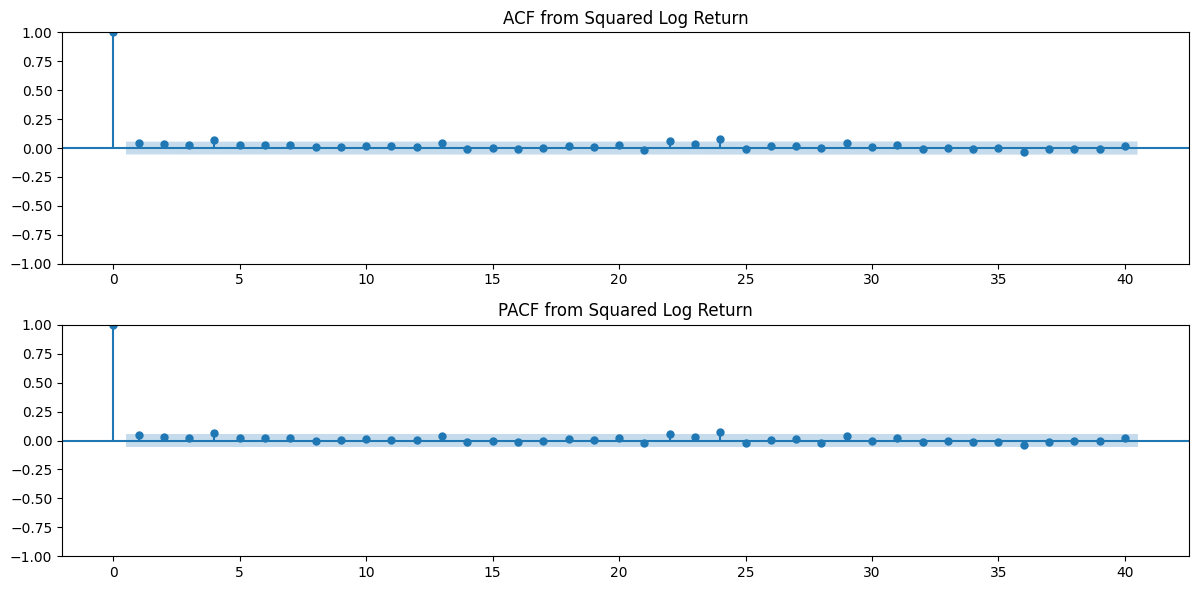

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Squared log return
close['SquaredReturn'] = close['LogReturn'] ** 2

# Drop NA untuk plot
squared_return = close['SquaredReturn'].dropna()

# ACF & PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(squared_return, ax=ax[0], lags=40)
ax[0].set_title('ACF from Squared Log Return')

plot_pacf(squared_return, ax=ax[1], lags=40, method='ywm')
ax[1].set_title('PACF from Squared Log Return')

plt.tight_layout()
plt.show()


ACF and PACF of Squared Return

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) help us detect patterns in a time series — especially whether current values depend on past values.

The ACF at lag $ k $ is defined as:

$$
\rho_k = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t)}
$$

The PACF at lag $ k $ is the partial correlation between $ X_t $ and $ X_{t-k} $, removing the effect of all intermediate lags. It can be defined as:

$$
\text{PACF}(k) = \phi_{kk}
$$

where $( \phi_{kk} )$ is the last coefficient in an autoregressive model of order $( k )$ $(AR(k))$:

$$
X_t = \phi_{k1} X_{t-1} + \phi_{k2} X_{t-2} + \dots + \phi_{kk} X_{t-k} + \varepsilon_t
$$

When applied to **squared returns**, they can reveal whether **volatility is clustered**, which is a signature of financial time series.

---

📌 Interpretation

In the ACF plot of squared returns:
- The **first few lags show significant spikes**, meaning that past squared returns help explain current volatility.
- This is a strong sign of **volatility persistence**, which justifies using models like GARCH or EWMA.

In the PACF plot:
- The **first lag dominates**, suggesting that a **GARCH(1,1)** model may be a good fit for future volatility modeling.
- The quick decay after lag 1 also supports the idea that most of the explanatory power lies in very recent shocks.

Together, the ACF and PACF confirm that NVDA’s volatility isn’t random. It clusters and depends on past behavior — exactly what volatility models aim to capture.


# Summary and Recommendations

> Summary

The analysis of NVDA’s daily closing price from 2020 to 2025 reveals a stock that is heavily influenced by both macroeconomic news and strategic product developments. By applying MA, WMA, and EWMA techniques, we identified both long-term trends and periods of heightened volatility—especially around major events such as export restrictions and AI infrastructure announcements.

The EWMA volatility chart, in particular, showed notable spikes that aligned with real-world disruptions, such as the $5.5B charge announcement in April 2025 and reports of growing Chinese AI chip competition. The ACF and PACF plots further confirmed the presence of autocorrelation in volatility, which supports the case for potential time series modeling in future research.

> Recommendations

- **For Analysts/Investors**: Use EWMA-based models to monitor volatility in real time, especially around earnings, geopolitical news, and major product launches. Combine with fundamental news for context.
- **For Risk Managers**: NVDA’s price volatility should be stress-tested against multiple shock scenarios. Short-term hedging strategies may be essential during regulatory windows.
- **For Academic Exploration**: The pattern in ACF/PACF opens the door for deeper modeling, such as GARCH-family or ARIMA-EGARCH approaches to better capture volatility clustering.

> Suggestions for Future Work

- Apply **Conditional Value at Risk (CVaR)** or **Value at Risk (VaR)** models to estimate tail risk exposure.
- Explore **GARCH or EGARCH** to model time-varying volatility more accurately.
- Combine **fundamental data (earnings, news sentiment)** with technical indicators for hybrid predictive models.
- Use **multiple assets** for comparison to assess portfolio-level risk (e.g., pairing NVDA with TSLA, AMD, or SOXX).

This marks a solid foundation in both technical analysis and real-world contextualization of volatility. Further steps can push this project toward more advanced modeling or practical use cases like strategy backtesting or portfolio optimization.
